In [7]:
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

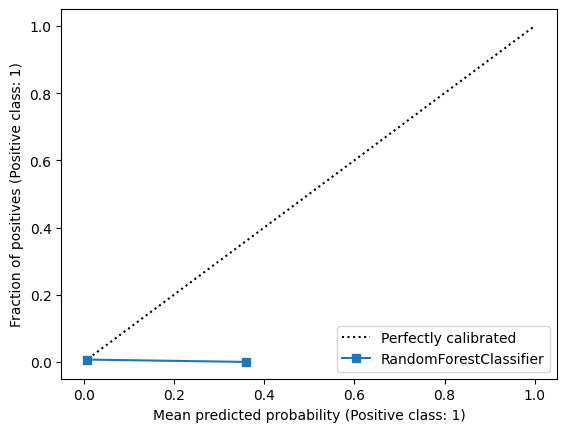

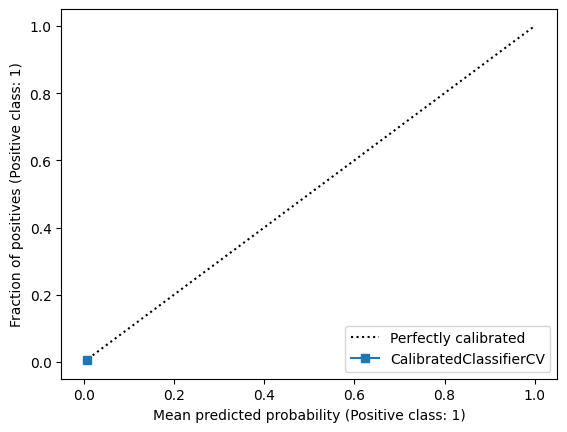

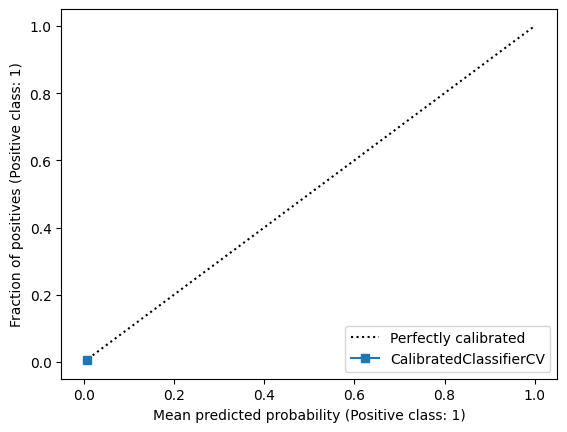

In [10]:
X, y = make_classification(
    n_samples=10000, n_features=100, n_informative=2, n_classes=2, weights=[0.999, 0.001], random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

calibrated_clf_sig = CalibratedClassifierCV(clf, method="sigmoid")
calibrated_clf_sig.fit(X_train, y_train)

calibrated_clf_iso = CalibratedClassifierCV(clf, method="isotonic")
calibrated_clf_iso.fit(X_train, y_train)

CalibrationDisplay.from_estimator(clf, X_test, y_test)
plt.show()

CalibrationDisplay.from_estimator(calibrated_clf_sig, X_test, y_test)
plt.show()

CalibrationDisplay.from_estimator(calibrated_clf_iso, X_test, y_test)
plt.show()